## 쿨루프 시공 대상 여부 분류
- Tasks
    1. Data Preprocessing
        - 모델 사용을 위해 데이터를 일관성 있게 정리해야 합니다.
    2. Object Detection
        - 전처리 된 데이터를 이용하여 학습을 진행하세요.
        - 인공위성 지도를 이용하여 이미지를 **추가적으로** 10장 수집하고 추론 과정에서 사용하세요.

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="LIril9321PJZpX7SdeA0")
project = rf.workspace("start-x6z0m").project("test_test_test_test")
version = project.version(4)
dataset = version.download("yolov8-obb")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test_test_test_test-4 in yolov8-obb:: 100%|████| 2044/2044 [00:01<00:00, 1584.21it/s]


In [ ]:
import zipfile
import os, glob, shutil
from tqdm import tqdm
import yaml
import matplotlib.pyplot as plt
from matplotlib import image

from sklearn.model_selection import train_test_split
from ultralytics import YOLO, settings

In [ ]:
classes_names = {0:'cool roof', 1:'generic roof'}

### 데이터셋 다운로드 및 압축 해제
- cool_roof_image.zip : 이미지 데이터 압축 파일
- cool_roof_yolo_labels.zip : YOLO 모델 형식에 맞게 가공된 레이블 파일

In [ ]:
def dataset_extract(file_name) :
    with zipfile.ZipFile(file_name, 'r') as zip_ref :
        file_list = zip_ref.namelist()

        if os.path.exists(f'./{file_name[:-4]}/') :
            print(f'데이터셋 폴더가 이미 존재합니다.')
            return

        else :
            for f in tqdm(file_list, desc='Extracting', unit='files') :
                zip_ref.extract(member=f, path=f'./{file_name[:-4]}/')

In [ ]:
dataset_extract('cool_roof_images.zip')

데이터셋 폴더가 이미 존재합니다.


In [ ]:
dataset_extract('cool_roof_yolo_labels.zip')

데이터셋 폴더가 이미 존재합니다.


### 폴더 생성
- YOLO 모델에서 요구하는 폴더의 형식이 있습니다.
- 해당 형식에 맞춰 폴더를 만드세요.

In [ ]:
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
        else:
            print("폴더가 이미 존재 합니다.")
    except OSError:
        print("Error: Failed to create the directory.")

In [ ]:
dataset_root_path = "./dataSet/"
img_train_path = dataset_root_path + "images/train"
img_valid_path = dataset_root_path + "images/valid"

label_train_path = dataset_root_path + "labels/train"
label_valid_path = dataset_root_path + "labels/valid"

In [ ]:
createDirectory(dataset_root_path)

폴더가 이미 존재 합니다.


In [ ]:
createDirectory(img_train_path)
createDirectory(img_valid_path)

폴더가 이미 존재 합니다.
폴더가 이미 존재 합니다.


In [ ]:
createDirectory(label_train_path)
createDirectory(label_valid_path)

폴더가 이미 존재 합니다.
폴더가 이미 존재 합니다.


### 데이터 스플릿 & 파일 이동
1. 재현을 위한 난수 고정 : 2024
2. 테스트셋 데이터 20%
- 위 설정에 맞게 데이터를 나누고, 위 과정에서 생성한 폴더에 이동시키세요.

In [ ]:
origin_img_path = "./test_test_test_test-4/train/images/"
origin_label_path = "./test_test_test_test-4/train/labels/"

In [ ]:
img_path = glob.glob(origin_img_path + "*.jpg")
label_path = glob.glob(origin_label_path + "*.txt")

len(img_path), len(label_path)

(1019, 1019)

In [ ]:
first = 0
second = 0
for path in label_path:
    with open(path, "r") as f:
        lines = f.readlines()
        for line in lines:
            if line.split(" ")[0] == "0":
                first += 1
            else :
                second += 1
first, second

(1918, 7859)

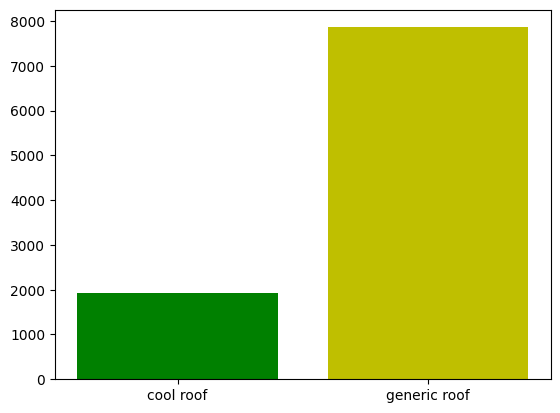

In [ ]:
x = np.arange(2)
classes = ['cool roof', 'generic roof']
values = [first, second]

plt.bar(x, values, color=['g', 'y'])
plt.xticks(x, classes)

plt.show()

In [ ]:
img_path[:5], label_path[:5]

(['./test_test_test_test-4/train/images\\001_jpg.rf.4054bbc04facc96ee07ceef1c74114a6.jpg',
  './test_test_test_test-4/train/images\\001_jpg.rf.827bec89a3a7b365ee2332bce8167871.jpg',
  './test_test_test_test-4/train/images\\001_jpg.rf.bb7a2aade473bd59222036e6cd8cfbf6.jpg',
  './test_test_test_test-4/train/images\\002_jpg.rf.2f8ff82feafe5a25b987e3f4f3592631.jpg',
  './test_test_test_test-4/train/images\\002_jpg.rf.898e96ca6c8c1b348c0d806d2037af82.jpg'],
 ['./test_test_test_test-4/train/labels\\001_jpg.rf.4054bbc04facc96ee07ceef1c74114a6.txt',
  './test_test_test_test-4/train/labels\\001_jpg.rf.827bec89a3a7b365ee2332bce8167871.txt',
  './test_test_test_test-4/train/labels\\001_jpg.rf.bb7a2aade473bd59222036e6cd8cfbf6.txt',
  './test_test_test_test-4/train/labels\\002_jpg.rf.2f8ff82feafe5a25b987e3f4f3592631.txt',
  './test_test_test_test-4/train/labels\\002_jpg.rf.898e96ca6c8c1b348c0d806d2037af82.txt'])

In [ ]:
train_img, val_img, train_label, val_label = train_test_split(img_path, label_path, test_size=.2, random_state=2024)
len(train_img), len(val_img)

(815, 204)

In [ ]:
dataset_root_path = "./dataSet/"
img_train_path = dataset_root_path + "images/train"
img_valid_path = dataset_root_path + "images/valid"

label_train_path = dataset_root_path + "labels/train"
label_valid_path = dataset_root_path + "labels/valid"

In [ ]:
def copyFile(source_paths, destination_path):
    # 목적지 폴더 비우기
    remain_path = glob.glob(destination_path + "/*")
    for path in remain_path:
        if os.path.isfile(path):
            os.remove(path)
        else:
            shutil.rmtree(path)

    # 복사
    for source in tqdm(source_paths):
        shutil.copyfile(source, destination_path + "/" + source.split("\\")[-1])

In [ ]:
copyFile(train_img, img_train_path)
copyFile(val_img, img_valid_path)
copyFile(train_label, label_train_path)
copyFile(val_label, label_valid_path)

100%|██████████████████████████████████████████████████████████████████████████████| 204/204 [00:00<00:00, 1636.23it/s]


In [ ]:
len(glob.glob(img_train_path + '/*')), len(glob.glob(img_valid_path+ '/*')),len(glob.glob(label_train_path+ '/*')),len(glob.glob(label_valid_path+ '/*'))

(815, 204, 815, 204)

### YOLO 모델에 적용할 YAML 생성하기
- 지붕에는 두 가지 형태가 있습니다. 클래스 구분에 주의하세요.
- cool roof
- generic roof

In [ ]:
os.getcwd()

'C:\\WorkSpace\\KTAIVLE\\jupyterFiles\\미니프로젝트_4차(3~4일차)'

In [ ]:
settings['datasets_dir'] = os.getcwd() + "/"
settings.update()
settings

{'settings_version': '0.0.4',
 'datasets_dir': 'C:\\WorkSpace\\KTAIVLE\\jupyterFiles\\미니프로젝트_4차(3~4일차)/',
 'weights_dir': 'weights',
 'runs_dir': 'runs',
 'uuid': '4590b493f999cce4d54e9fa67dd15375dc519c2754e6636aef212efaba17ff7b',
 'sync': True,
 'api_key': '',
 'openai_api_key': '',
 'clearml': True,
 'comet': True,
 'dvc': True,
 'hub': True,
 'mlflow': True,
 'neptune': True,
 'raytune': True,
 'tensorboard': True,
 'wandb': True}

In [ ]:
yaml_path = "./dataSet/data.yaml"

In [ ]:
data = {
        "train" : './images/train/',
        "val" : './images/valid/',
        # "test" : '/images/test/', optional
        "names" : classes_names
}

with open(yaml_path, 'w') as f :
    yaml.dump(data, f)

# check written file
with open(yaml_path, 'r') as f :
    lines = yaml.safe_load(f)
    print(lines)

{'names': {0: 'cool roof', 1: 'generic roof'}, 'train': './images/train/', 'val': './images/valid/'}


### YOLO v8 모델
- yaml 파일의 경로 설정에 주의하세요.

In [ ]:
model = YOLO(model='yolov8n.pt')

In [ ]:
model.train(data=yaml_path,
            epochs=150,
            patience=20,
            seed=2024,
            pretrained=True,
            )

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataSet/data.yaml, epochs=150, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=2024, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fals

train: Scanning C:\WorkSpace\KTAIVLE\jupyterFiles\미니프로젝트_4차(3~4일차)\dataSet\labels\train... 815 images, 0 backg

train: New cache created: C:\WorkSpace\KTAIVLE\jupyterFiles\_4(3~4)\dataSet\labels\train.cache



val: Scanning C:\WorkSpace\KTAIVLE\jupyterFiles\미니프로젝트_4차(3~4일차)\dataSet\labels\valid... 204 images, 0 backgro

val: New cache created: C:\WorkSpace\KTAIVLE\jupyterFiles\_4(3~4)\dataSet\labels\valid.cache


Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150       2.5G      1.511      2.394      1.521        244        640: 100%|██████████| 51/51 [00:06<00:00,  8.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<0

                   all        204       1994       0.38      0.575      0.356        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      2.38G      1.456      1.566      1.488        307        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<0

                   all        204       1994      0.592      0.619        0.6      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      2.73G      1.399      1.404      1.426        230        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<0

                   all        204       1994      0.636      0.644      0.651      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      2.42G      1.418       1.38      1.431        243        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.602      0.573      0.556      0.298



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150       2.5G      1.369      1.276      1.391        239        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.602      0.682       0.66      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      2.28G      1.357      1.218      1.372        312        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.656      0.664      0.685      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      2.44G      1.336       1.18      1.363        318        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.587      0.651      0.642      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      2.28G      1.323      1.122      1.347        186        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<0

                   all        204       1994      0.688      0.733      0.739      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      2.77G      1.328      1.108      1.341        287        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.701       0.74      0.745      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       2.6G      1.275       1.06      1.317        261        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.674      0.766      0.777      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      2.71G      1.293      1.059      1.324        240        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.703      0.761      0.771      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      2.45G        1.3      1.047      1.332        299        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.733      0.746      0.796      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      2.37G      1.261     0.9831      1.306        273        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.653      0.655       0.68      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      2.43G      1.238     0.9605      1.294        274        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.728        0.8      0.816      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      2.42G      1.254     0.9662      1.293        302        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.664      0.707      0.685      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      2.43G      1.241     0.9585       1.29        280        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.726      0.732      0.772      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      2.49G      1.192     0.9147      1.262        287        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.702      0.761       0.75      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      2.42G      1.219     0.9162      1.273        272        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.706      0.687      0.755      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      2.46G      1.204     0.9036      1.267        340        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.757      0.807      0.802      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      2.56G      1.192     0.8862      1.255        352        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.779      0.813      0.839      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      2.43G      1.186     0.8581       1.25        245        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.769      0.809       0.85      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      2.34G      1.149     0.8456      1.236        214        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.769      0.706      0.789      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      2.43G      1.164      0.863      1.244        317        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.695      0.756      0.771      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150       2.4G      1.134     0.8178      1.227        241        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.776      0.809      0.844      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      2.48G      1.141     0.8255      1.229        316        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.808      0.782      0.848      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      2.41G      1.124        0.8      1.219        245        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.708      0.828      0.792      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      2.46G      1.129     0.7968      1.214        289        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.797      0.822      0.849       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      2.25G      1.132     0.8032      1.222        254        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.737      0.795      0.836      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      2.47G      1.107     0.7756      1.207        256        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.781      0.827      0.872      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      2.39G      1.102     0.7708      1.206        291        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.825      0.819      0.873      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150      2.63G      1.104     0.7755      1.206        292        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.799      0.843      0.874      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      2.59G      1.089     0.7653      1.195        280        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.794      0.817      0.864       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      2.61G      1.103     0.7644        1.2        313        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.792      0.828      0.868       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      2.62G       1.08     0.7404      1.197        327        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.836      0.872      0.907      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      2.41G      1.087     0.7271      1.195        249        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.818      0.864      0.893      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      2.43G      1.058     0.7307      1.183        207        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.825      0.767      0.867      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      2.38G      1.067     0.7106      1.185        373        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.849      0.863      0.909      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      2.26G      1.075     0.7148      1.187        320        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.859      0.847       0.91      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      2.47G      1.045     0.6988      1.175        296        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.81      0.876      0.911      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      2.43G       1.06      0.705      1.176        367        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.813      0.868      0.905      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      2.45G      1.028     0.6916      1.159        264        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.815      0.834      0.906      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      2.56G      1.029     0.6822      1.152        339        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.855      0.837      0.896      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      2.53G      1.036     0.6857      1.156        202        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.815      0.861      0.913      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      2.46G      1.033     0.6787      1.158        318        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.831      0.862      0.898      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      2.52G      1.022     0.6805       1.16        250        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.847       0.83      0.888      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      2.29G     0.9952     0.6607      1.136        273        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.846       0.84      0.896      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      2.44G      1.002     0.6611      1.148        301        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.819      0.843       0.89      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150       2.4G     0.9931     0.6562      1.143        275        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.882      0.865      0.933      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      2.48G     0.9996     0.6449      1.145        271        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.881       0.87       0.93       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      2.56G     0.9919     0.6381      1.134        266        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.859      0.883       0.92       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      2.46G     0.9966     0.6506      1.146        233        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.818      0.838      0.877      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      2.49G      1.001     0.6481      1.137        341        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.871      0.844       0.91      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      2.43G      0.956     0.6225      1.117        303        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.877      0.891      0.933      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      2.44G     0.9673     0.6145      1.119        232        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.842      0.849      0.899       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       2.6G     0.9708     0.6275      1.125        273        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.852      0.894      0.929      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150       2.5G     0.9671     0.6155      1.117        323        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.884      0.883      0.935      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      2.42G     0.9551     0.6125      1.119        255        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.861      0.877      0.917      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      2.46G     0.9494     0.6068       1.11        309        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.862      0.848      0.915      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      2.59G      0.942     0.5876      1.102        329        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.902      0.895      0.944      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      2.47G     0.9372     0.5951      1.107        291        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.88      0.891      0.927      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      2.29G     0.9399     0.5965      1.111        236        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.866      0.921      0.946      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150      2.42G     0.9263     0.5873      1.097        269        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.856      0.863      0.931      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      2.42G     0.9539     0.5992      1.108        274        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.872      0.895       0.94      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      2.62G     0.9147      0.579       1.09        272        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.893      0.883       0.94      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      2.34G     0.9221     0.5746      1.096        302        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.922      0.884       0.95      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150      2.43G      0.899     0.5603      1.079        278        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.879      0.907      0.946      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150      2.25G     0.9117     0.5797      1.092        303        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.895      0.902      0.947      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      2.43G     0.9141     0.5793      1.085        207        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.915      0.904       0.96      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      2.46G     0.9063     0.5738      1.089        313        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.895      0.903      0.947      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150      2.57G     0.9121     0.5759      1.093        318        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.907      0.897      0.953      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      2.43G     0.8964     0.5608      1.077        283        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.917      0.895      0.957      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      2.47G     0.8983     0.5626      1.082        223        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.895      0.906       0.96      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      2.32G     0.8846     0.5519      1.076        326        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.908      0.922      0.965       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150      2.44G     0.8787     0.5553      1.074        276        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.895      0.912      0.953      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150      2.67G     0.8771      0.542      1.073        243        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.897      0.885      0.947      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      2.45G      0.883     0.5467      1.072        268        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.904      0.901      0.947      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      2.46G     0.8655     0.5436      1.061        274        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994        0.9      0.905      0.952      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150      2.59G       0.86     0.5328      1.062        329        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.922      0.918      0.966      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150      2.58G     0.8672     0.5464       1.07        268        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.921       0.91      0.961       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      2.45G     0.8696     0.5362      1.066        232        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.912      0.911      0.961      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      2.44G     0.8577     0.5313      1.062        343        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.911      0.917      0.956      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150      2.26G     0.8475     0.5277      1.059        312        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.928      0.917      0.964      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      2.41G     0.8495     0.5205      1.052        321        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.915      0.926      0.963       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      2.52G     0.8411     0.5174      1.053        292        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.932      0.915      0.966      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      2.72G     0.8403     0.5142       1.05        291        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.927      0.909      0.954      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150      2.49G     0.8484     0.5181      1.052        302        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.935      0.924      0.959      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150      2.46G     0.8595     0.5244      1.065        287        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.923      0.912      0.956       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      2.61G     0.8346     0.5048      1.042        305        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.922      0.924      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      2.43G     0.8355     0.5174      1.051        226        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.906      0.937      0.963      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       2.6G     0.8096     0.4982       1.03        357        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.942      0.918      0.966      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      2.44G     0.8242     0.5103       1.04        315        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.932      0.929      0.968      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150       2.4G     0.8235     0.5075      1.043        317        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.915      0.933      0.962      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      2.62G     0.8218     0.4996      1.036        400        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.945      0.882      0.963      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       2.6G     0.8251     0.5062      1.041        392        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.935      0.929       0.97      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      2.45G     0.8134     0.5047      1.037        284        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.934        0.9      0.959      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      2.45G     0.8076     0.5018      1.032        424        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.952       0.92      0.972      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      2.32G     0.7965     0.4891       1.03        262        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.917      0.937      0.971      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150      2.58G     0.7915     0.4851      1.032        243        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.943      0.919      0.967      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150      2.34G     0.8103     0.4945      1.035        330        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.95       0.92      0.967      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      2.34G     0.7999     0.4894      1.037        274        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.944      0.924      0.967      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150       2.6G     0.7945     0.4864      1.025        266        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.923      0.924      0.969      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150      2.49G     0.8032     0.4897       1.03        274        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.938      0.922      0.972       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150      2.46G     0.7986     0.4851      1.027        268        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.94      0.929      0.974      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      2.26G      0.779      0.479      1.025        253        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.938      0.921       0.97      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      2.29G     0.7887     0.4822      1.025        268        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.929      0.937      0.967      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150      2.42G     0.7789      0.474      1.018        299        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.938      0.902      0.968       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      2.54G     0.7861     0.4806      1.023        247        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.953      0.924       0.97      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      2.55G     0.7695     0.4715      1.018        248        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.959      0.924      0.972      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      2.32G     0.7563     0.4677      1.012        290        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.934      0.933       0.97      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150      2.41G     0.7691     0.4678      1.016        333        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.932      0.944      0.969      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150      2.43G     0.7694     0.4635      1.011        259        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.941      0.939      0.972      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      2.46G     0.7655       0.46      1.013        250        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.939      0.933      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150       2.6G     0.7498     0.4586       1.01        282        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.932      0.932       0.97      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       2.3G     0.7597     0.4673      1.015        361        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.939      0.939      0.972      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150      2.26G     0.7573      0.466      1.006        301        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.952      0.918      0.971      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      2.25G     0.7574      0.461      1.009        298        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.946      0.923      0.972      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      2.43G     0.7447     0.4536      1.002        286        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.937      0.944      0.972      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      2.45G     0.7494     0.4588      1.007        266        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.94      0.928      0.973      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150      2.61G      0.741     0.4497      1.002        218        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.95      0.929      0.974      0.773



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      2.44G     0.7355     0.4459      0.999        230        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.948      0.935      0.972      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      2.61G     0.7304     0.4408     0.9974        241        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.948      0.936      0.976      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      2.72G     0.7338     0.4483     0.9985        285        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.946      0.928      0.971      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150      2.27G     0.7254     0.4371     0.9931        293        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.951       0.94       0.97      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      2.44G      0.723       0.44     0.9958        260        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.943      0.941      0.971      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      2.46G      0.722     0.4439     0.9964        314        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.949      0.935      0.974      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150      2.27G     0.7207     0.4385     0.9909        312        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.931      0.952      0.973      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150      2.44G     0.7314     0.4461     0.9962        281        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.957       0.93      0.972      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150       2.4G     0.7156     0.4357     0.9891        329        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.957      0.927      0.976      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      2.47G      0.705     0.4296     0.9904        266        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.938      0.951      0.978      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150      2.73G       0.71      0.435      0.992        303        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.947       0.95      0.977      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      2.42G     0.7029     0.4309     0.9889        244        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.953      0.943      0.976      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      2.43G     0.7077     0.4389     0.9931        287        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.96      0.939      0.977      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      2.45G     0.7006     0.4291      0.983        273        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.957      0.938      0.978      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150      2.55G     0.6983     0.4262     0.9819        269        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.961      0.933      0.976      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150      2.43G     0.6982     0.4276     0.9795        359        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.952      0.944      0.977      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      2.26G     0.6979     0.4232      0.986        272        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.957      0.935      0.974      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      2.45G     0.6946     0.4211     0.9807        264        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.954      0.939      0.976      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150      2.46G     0.6961     0.4287     0.9796        298        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.966      0.934      0.978      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150      2.59G     0.6975     0.4249     0.9809        294        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.961      0.942       0.98       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150       2.4G     0.6867     0.4127      0.977        318        640: 100%|██████████| 51/51 [00:04<00:00, 10.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.959      0.933      0.978      0.789


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      2.21G     0.6509     0.3647     0.9519        110        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.947      0.931      0.973      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150      2.17G     0.6139     0.3218     0.9304        145        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.956      0.935      0.977      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150      2.18G     0.5998     0.3173     0.9235        136        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.945       0.94      0.977      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      2.18G     0.5944      0.316     0.9223        125        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.96      0.942      0.977      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150       2.2G     0.5945     0.3107     0.9253        133        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.961      0.939      0.979      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150      2.18G     0.5776      0.306     0.9165        155        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.962      0.943      0.979      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150      2.18G     0.5672     0.3005     0.9107        156        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994       0.96      0.944      0.977      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      2.16G     0.5827     0.3067     0.9204        136        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.958      0.943      0.979      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      2.13G     0.5813     0.3099     0.9213        124        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.968      0.938       0.98       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150      2.23G     0.5684     0.3013     0.9124        139        640: 100%|██████████| 51/51 [00:04<00:00, 11.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:00<0

                   all        204       1994      0.966      0.938      0.978       0.79



150 epochs completed in 0.257 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 6.3MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:01<0


                   all        204       1994      0.957      0.944      0.979      0.792
             cool roof        204        381      0.949      0.934      0.972      0.802
          generic roof        204       1613      0.966      0.953      0.985      0.781
Speed: 0.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002158D472800>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [ ]:
sources = glob.glob("./dataSet/images/valid/*.jpg")

In [ ]:
model.predict(source=sources, save=True, line_width=2)


0: 640x640 1 cool roof, 2 generic roofs, 1.3ms
1: 640x640 5 cool roofs, 1 generic roof, 1.3ms
2: 640x640 4 cool roofs, 3 generic roofs, 1.3ms
3: 640x640 3 cool roofs, 5 generic roofs, 1.3ms
4: 640x640 3 cool roofs, 6 generic roofs, 1.3ms
5: 640x640 4 cool roofs, 5 generic roofs, 1.3ms
6: 640x640 3 cool roofs, 5 generic roofs, 1.3ms
7: 640x640 4 cool roofs, 27 generic roofs, 1.3ms
8: 640x640 6 cool roofs, 24 generic roofs, 1.3ms
9: 640x640 5 cool roofs, 25 generic roofs, 1.3ms
10: 640x640 2 cool roofs, 12 generic roofs, 1.3ms
11: 640x640 2 cool roofs, 11 generic roofs, 1.3ms
12: 640x640 2 cool roofs, 9 generic roofs, 1.3ms
13: 640x640 1 cool roof, 9 generic roofs, 1.3ms
14: 640x640 3 cool roofs, 8 generic roofs, 1.3ms
15: 640x640 5 cool roofs, 15 generic roofs, 1.3ms
16: 640x640 5 cool roofs, 18 generic roofs, 1.3ms
17: 640x640 1 cool roof, 3 generic roofs, 1.3ms
18: 640x640 1 cool roof, 20 generic roofs, 1.3ms
19: 640x640 18 generic roofs, 1.3ms
20: 640x640 4 cool roofs, 8 generic roo

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'cool roof', 1: 'generic roof'}
 obb: None
 orig_img: array([[[128, 120, 130],
         [129, 121, 131],
         [131, 123, 133],
         ...,
         [154, 149, 150],
         [154, 149, 150],
         [155, 150, 151]],
 
        [[129, 121, 131],
         [129, 121, 131],
         [131, 123, 133],
         ...,
         [154, 149, 150],
         [154, 149, 150],
         [155, 150, 151]],
 
        [[128, 120, 130],
         [129, 121, 131],
         [130, 122, 132],
         ...,
         [153, 148, 149],
         [154, 149, 150],
         [155, 150, 151]],
 
        ...,
 
        [[132, 130, 130],
         [132, 130, 130],
         [133, 131, 131],
         ...,
         [147, 143, 148],
         [146, 142, 147],
         [145, 141, 146]],
 
        [[132, 130, 129],
         [132, 130, 129],
         [132, 130, 129],
         .

In [ ]:
def displayImage(image_path):
    # 이미지 불러오기
    img = image.imread(image_path)

    # 이미지 출력
    plt.imshow(img)
    plt.axis('off')  # 축 레이블 끄기
    plt.show()

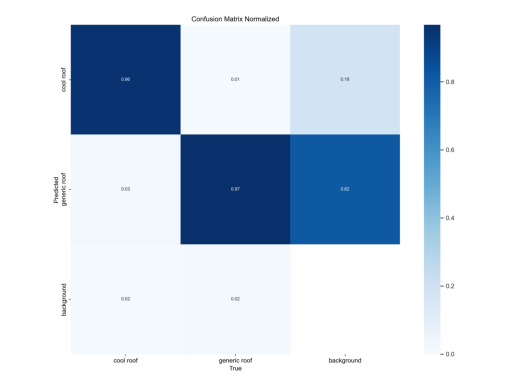

In [ ]:
displayImage('./runs/detect/train4/confusion_matrix_normalized.png')

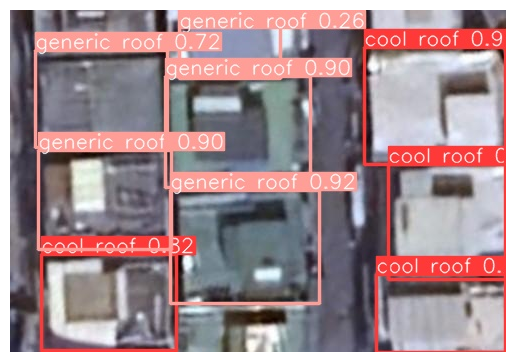

In [ ]:
displayImage('./runs/detect/train42/010_jpg.rf.817b9c95f0bde66bdf08339fa8fe2f15.jpg')

#### Object Oriented Detection

In [ ]:
model_obb = YOLO(model='yolov8n-obb.pt')

In [ ]:
model_obb.train(data=yaml_path,
            epochs=150,
            patience=20,
            seed=2024,
            pretrained=True,
            )

New https://pypi.org/project/ultralytics/8.1.47 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
engine\trainer: task=obb, mode=train, model=yolov8n-obb.pt, data=./dataSet/data.yaml, epochs=150, time=None, patience=20, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=2024, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fal

train: Scanning C:\WorkSpace\KTAIVLE\jupyterFiles\미니프로젝트_4차(3~4일차)\dataSet\labels\train.cache... 815 images, 0
val: Scanning C:\WorkSpace\KTAIVLE\jupyterFiles\미니프로젝트_4차(3~4일차)\dataSet\labels\valid.cache... 204 images, 0 b


Plotting labels to runs\obb\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 63 weight(decay=0.0), 73 weight(decay=0.0005), 72 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs\obb\train
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      6.04G      1.366      1.833      2.444        242       1024: 100%|██████████| 51/51 [00:11<00:00,  4.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03

                   all        204       1994      0.659       0.71      0.672      0.327



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150      5.56G      1.158      1.114      2.187        305       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.64      0.792      0.749       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150      5.77G      1.092     0.9845      2.139        230       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.722      0.783      0.799      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.75G      1.092      0.957      2.157        243       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.75      0.774      0.762      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.75G      1.043      0.888      2.116        238       1024: 100%|██████████| 51/51 [00:09<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.775      0.801      0.843      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150      5.63G      1.035     0.8433      2.112        312       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.74      0.762      0.775      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.58G     0.9992     0.8341      2.111        318       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.748       0.81      0.817      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.58G     0.9693     0.7914      2.039        185       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.781      0.825      0.852      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.69G     0.9612     0.7666       2.03        286       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.777      0.852      0.871      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150      6.15G     0.9446     0.7473      2.063        259       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.694      0.751      0.773      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150      5.58G     0.9478       0.73      2.039        239       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.806      0.812      0.847      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.81G     0.9368     0.7417       2.07        298       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.792      0.825      0.867      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.69G     0.9003     0.6985      2.008        271       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.787      0.825      0.844      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150      5.63G      0.893     0.6745      2.002        273       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.82      0.879      0.891      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150      5.89G      0.919     0.6821      2.003        301       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.851      0.858      0.906      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.61G      0.914     0.6822      2.038        277       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.857      0.861      0.913      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.64G     0.8661     0.6465      1.999        287       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.841      0.865      0.906      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150      5.58G     0.8766     0.6483      2.006        270       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.844      0.875      0.918      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150      5.84G      0.852     0.6424      1.994        340       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.837      0.875      0.913      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.79G     0.8438     0.6298      1.978        350       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.849       0.86      0.896      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.78G     0.8332      0.622      1.979        245       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.864      0.879      0.916      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150      5.62G     0.8234     0.6064       1.96        214       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.845      0.824      0.879      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150       5.7G     0.8331     0.6208      1.973        318       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.858      0.837      0.898      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.68G     0.8092     0.5878      1.965        239       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.856      0.879      0.915      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.69G     0.8107     0.5926      1.958        313       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.907      0.889      0.937       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150      6.21G     0.8052     0.5836      1.962        245       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.876      0.878       0.92      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150      5.61G     0.8051     0.5821      1.943        289       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.879      0.882      0.928      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.66G     0.8007     0.5807      1.954        251       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.867      0.889      0.913      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.65G     0.7918     0.5707      1.932        255       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.906      0.888      0.938      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150      5.66G     0.7838     0.5691      1.953        287       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.896      0.922      0.951      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150       5.8G     0.7749     0.5569      1.922        291       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.878      0.893      0.933      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.61G     0.7621     0.5563      1.935        279       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.89      0.893      0.939      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.94G      0.805     0.5716      1.945        311       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.913      0.883      0.934      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150      6.04G     0.7657     0.5498       1.93        327       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.864       0.91       0.94      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.68G     0.7627     0.5346      1.917        248       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.894       0.91      0.941      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.63G     0.7515     0.5505       1.94        204       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.888       0.86       0.93      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.71G     0.7515     0.5347      1.916        371       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.904      0.907      0.948       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150      5.68G     0.7634     0.5371      1.909        319       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.876      0.909      0.948      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150      5.64G     0.7225     0.5212      1.914        295       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.885      0.907      0.948      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.61G     0.7317     0.5297      1.901        364       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.897      0.921      0.957      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.64G     0.7199     0.5205      1.902        263       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.887       0.92       0.95      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150      5.88G     0.7218     0.5086      1.864        336       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.921      0.915      0.954      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150      5.67G     0.7177      0.512      1.863        201       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.909      0.913      0.957      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.71G     0.7225     0.5068      1.907        316       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.917      0.936      0.962      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.84G     0.7211     0.5086      1.903        248       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.911      0.919      0.951      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150      5.62G     0.6907     0.4881      1.864        272       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.918      0.931      0.953       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150      5.62G     0.6908     0.4914      1.868        300       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.917      0.921      0.957      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.64G     0.6881     0.4874      1.887        273       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.929      0.932      0.965      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.66G     0.6893      0.482      1.866        269       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.912      0.918      0.946      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150      5.71G     0.6905     0.4864      1.853        260       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.92      0.927       0.95      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.81G     0.7211     0.4989      1.889        229       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.916      0.921       0.94       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.87G      0.701     0.4903      1.878        341       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.915      0.923      0.957      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.58G     0.6655     0.4618      1.847        303       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.925      0.906      0.959      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150      5.62G     0.6802     0.4734      1.855        230       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.942       0.93      0.962      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150      5.63G     0.6833     0.4743      1.864        272       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.93      0.919      0.951      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.65G     0.6624     0.4666      1.842        322       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.941      0.931      0.952       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.67G     0.6687     0.4719      1.872        253       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994        0.9      0.912      0.953      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.64G     0.6601     0.4582      1.837        309       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.935      0.919      0.968      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150      5.63G     0.6444     0.4535      1.821        328       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994       0.91      0.937      0.958      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.83G     0.6609     0.4568      1.853        291       1024: 100%|██████████| 51/51 [00:08<00:00,  5.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01

                   all        204       1994      0.932      0.934      0.958      0.518
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 40, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



60 epochs completed in 0.182 hours.
Optimizer stripped from runs\obb\train\weights\last.pt, 6.9MB
Optimizer stripped from runs\obb\train\weights\best.pt, 6.9MB

Validating runs\obb\train\weights\best.pt...
Ultralytics YOLOv8.1.42  Python-3.10.14 torch-2.2.2+cu118 CUDA:0 (NVIDIA GeForce RTX 3080, 10240MiB)
YOLOv8n-obb summary (fused): 187 layers, 3077609 parameters, 0 gradients, 8.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05


                   all        204       1994      0.893      0.926      0.957      0.536
             cool roof        204        381      0.843      0.929      0.946      0.534
          generic roof        204       1613      0.943      0.924      0.967      0.538
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to runs\obb\train


ultralytics.utils.metrics.OBBMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x0000021595A72080>
curves: []
curves_results: []
fitness: 0.5781970895339171
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.53386,     0.53844])
names: {0: 'cool roof', 1: 'generic roof'}
plot: True
results_dict: {'metrics/precision(B)': 0.8930233716545863, 'metrics/recall(B)': 0.9264615488399279, 'metrics/mAP50(B)': 0.9566251541337788, 'metrics/mAP50-95(B)': 0.5361495268005991, 'fitness': 0.5781970895339171}
save_dir: WindowsPath('runs/obb/train')
speed: {'preprocess': 0.28395769642848595, 'inference': 2.5687767010109095, 'loss': 0.0, 'postprocess': 6.446975118973676}

In [ ]:
model_obb.predict(source=sources, save=True, line_width=2)


0: 1024x1024 101.3ms
1: 1024x1024 101.3ms
2: 1024x1024 101.3ms
3: 1024x1024 101.3ms
4: 1024x1024 101.3ms
5: 1024x1024 101.3ms
6: 1024x1024 101.3ms
7: 1024x1024 101.3ms
8: 1024x1024 101.3ms
9: 1024x1024 101.3ms
10: 1024x1024 101.3ms
11: 1024x1024 101.3ms
12: 1024x1024 101.3ms
13: 1024x1024 101.3ms
14: 1024x1024 101.3ms
15: 1024x1024 101.3ms
16: 1024x1024 101.3ms
17: 1024x1024 101.3ms
18: 1024x1024 101.3ms
19: 1024x1024 101.3ms
20: 1024x1024 101.3ms
21: 1024x1024 101.3ms
22: 1024x1024 101.3ms
23: 1024x1024 101.3ms
24: 1024x1024 101.3ms
25: 1024x1024 101.3ms
26: 1024x1024 101.3ms
27: 1024x1024 101.3ms
28: 1024x1024 101.3ms
29: 1024x1024 101.3ms
30: 1024x1024 101.3ms
31: 1024x1024 101.3ms
32: 1024x1024 101.3ms
33: 1024x1024 101.3ms
34: 1024x1024 101.3ms
35: 1024x1024 101.3ms
36: 1024x1024 101.3ms
37: 1024x1024 101.3ms
38: 1024x1024 101.3ms
39: 1024x1024 101.3ms
40: 1024x1024 101.3ms
41: 1024x1024 101.3ms
42: 1024x1024 101.3ms
43: 1024x1024 101.3ms
44: 1024x1024 101.3ms
45: 1024x1024 101.3

[ultralytics.engine.results.Results object with attributes:
 
 boxes: None
 keypoints: None
 masks: None
 names: {0: 'cool roof', 1: 'generic roof'}
 obb: ultralytics.engine.results.OBB object
 orig_img: array([[[128, 120, 130],
         [129, 121, 131],
         [131, 123, 133],
         ...,
         [154, 149, 150],
         [154, 149, 150],
         [155, 150, 151]],
 
        [[129, 121, 131],
         [129, 121, 131],
         [131, 123, 133],
         ...,
         [154, 149, 150],
         [154, 149, 150],
         [155, 150, 151]],
 
        [[128, 120, 130],
         [129, 121, 131],
         [130, 122, 132],
         ...,
         [153, 148, 149],
         [154, 149, 150],
         [155, 150, 151]],
 
        ...,
 
        [[132, 130, 130],
         [132, 130, 130],
         [133, 131, 131],
         ...,
         [147, 143, 148],
         [146, 142, 147],
         [145, 141, 146]],
 
        [[132, 130, 129],
         [132, 130, 129],
         [132, 130, 129],
         ...

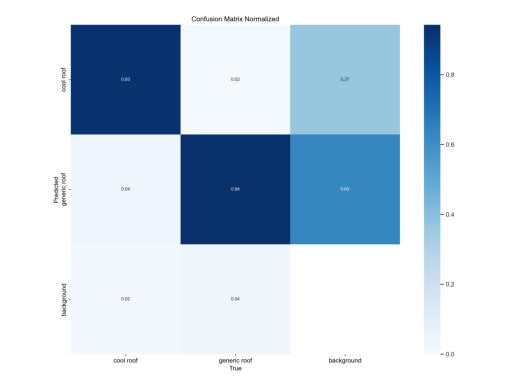

In [ ]:
displayImage('./runs/obb/train/confusion_matrix_normalized.png')

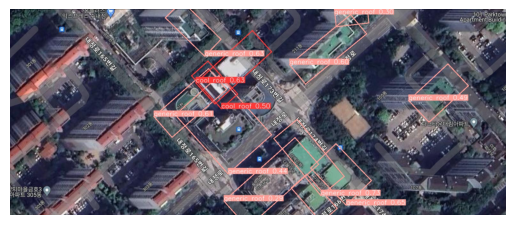

In [ ]:
displayImage('./runs/obb/train2/1_png.rf.0c544db7fc46c8bc2488a62710f19d23.jpg')